In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
rbc = pd.read_csv('AlgType = 1', names=['N' ,'Time(s)'])
cbc = pd.read_csv('AlgType = 2', names=['N' ,'Time(s)'])
mm = pd.read_csv('AlgType = 3', names=['N' ,'Time(s)'])

In [3]:
# fits (t = c*N^m  ==>  log(t) = log(c) + m*log(N))

def poly_fit_function(x, m, c):
    """
    Parametric curve of the type c*x^m

    Parameters
    ----------
    x : real 
        curve variable
    c, m : real
        curve parameters

    Returns
    -------
    y : real
    """
    return c*x**m

def LinearfFitPlot(data, title, rounded):
    """
    Linear fit of data, returns the optimal parameters (least-square) and plot results.

    Parameters
    ----------
    data : dataframe 
        two columns: N and time
    title: string
        title of the plot
    rounded: integer
        number of significative numebers show in the legend plot
    Returns
    -------
    m, c : real
        optimal parameters
    """
    # nanoseconds!
    t = data['Time(s)']*10**9
    N = data['N']
    # fit
    x, y = np.log10(N), np.log10(t)
    m, log_c = np.polyfit(x, y, 1)
    c = 10**log_c
    
    # plot 
    _, ax = plt.subplots(figsize=(10,7))
    
    ax.scatter(N, t, label='Data')
    
    x_fit = np.linspace(min(data['N']), max(data['N']), 100)
    y_fit = poly_fit_function(x_fit, m, c)
    ax.plot(x_fit, y_fit, label=f'Fit: y={round(c,rounded)}x^{round(m,rounded)}', color='orange')
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('N', fontsize=18)
    ax.set_ylabel('t (ns)', fontsize=18)
    ax.legend(fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.loglog()
    ax.grid()
    
    return m, c

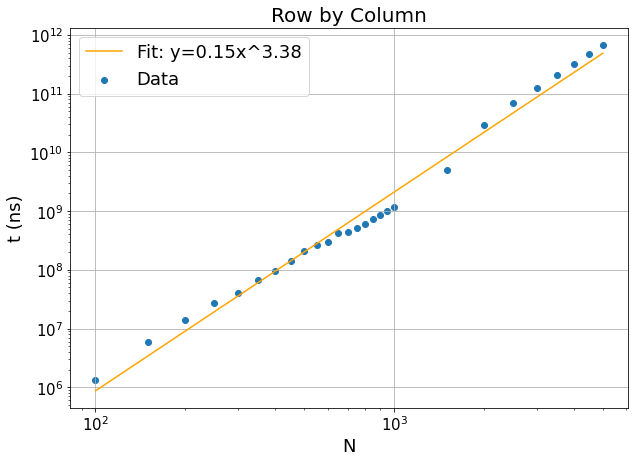

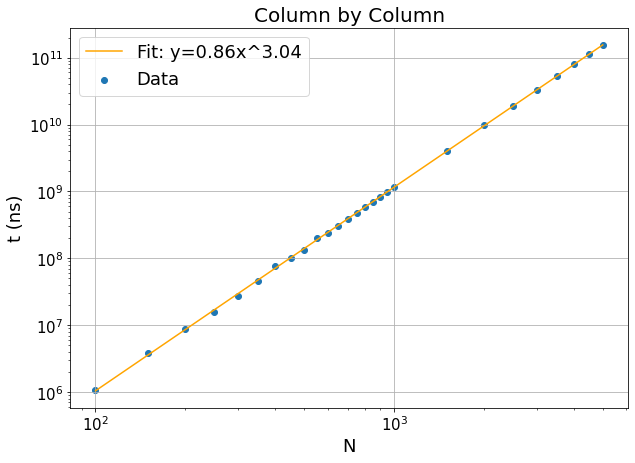

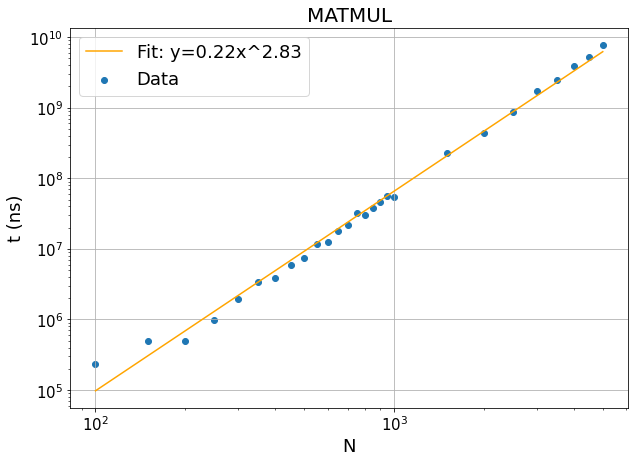

In [4]:
df_list = [rbc, cbc, mm]
titles_list = ['Row by Column', 'Column by Column', 'MATMUL']

for ii in range(3):
    LinearfFitPlot(df_list[ii], titles_list[ii], 2)